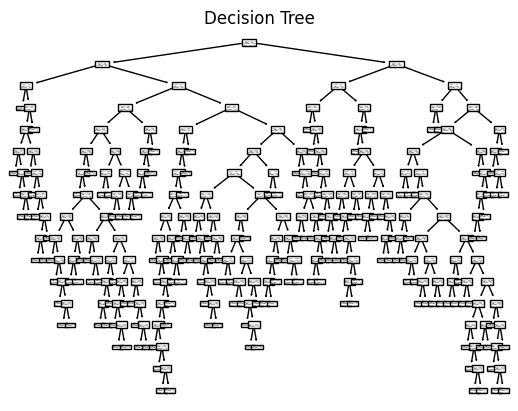

Mean Cross validation scores before pruning: 0.7927136021872865


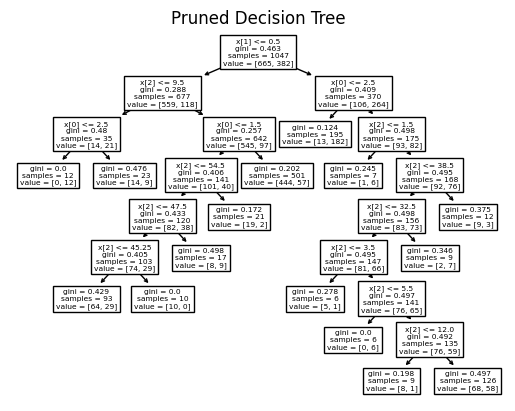

Mean Cross validation scores after pruning:: 0.7984370015948963
LogisticRegression Mean Cross validation accuracy: 0.7898382319434951


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#read the titanic dataset
data = pd.read_csv('titanic3.csv')
#map char values to binary values
char_to_bin = {'male': 0, 'female': 1}
#Over-write the the sex column with binary values
data['sex'] = data['sex'].map(char_to_bin)
#Extract predictor and dependent variables
data = data[['pclass', 'age', 'sex','survived']]
#Fill the nan values with the mean for each column
data = data.fillna(data.mean())
# print(data)
#Extract feature variables into X
X = data[['pclass', 'sex', 'age']]
#Extract dependent variables into y
y = data['survived']
#column names into cols
cols = ['pclass', 'sex', 'age']

#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create an instance of decision tree classifier and plot it
dtc = DecisionTreeClassifier(random_state=42)
#Fit the decision tree model using the train and test data
model = dtc.fit(X_train, y_train)
#plot the decision classifier
plot_tree(model)
#Set the title of the decision tree
plt.title("Decision Tree")
plt.show()

#Performance of the decision tree before pruning 
pred_y = dtc.predict(X_test)
#Accuracy of the model
accuracy1 = accuracy_score(y_test, pred_y)
#Cross validation score of the model 
cv_scores_1 = cross_val_score(dtc, X_train, y_train, cv=5, scoring='accuracy')
#MPrint the result to the console
print(f"Mean Cross validation scores before pruning: {cv_scores_1.mean()}")
# print(f'Accuracy of the test set before pruning: {accuracy1}')

#Perform cost complexity pruning
pruning_path = dtc.cost_complexity_pruning_path(X_train, y_train)
#This function returns alpha values and impurities
alphas, impurities = pruning_path.ccp_alphas, pruning_path.impurities

#Determining the best pruning level using cross-validation
best_level = None
#This variable will hold the mean cross validation score
mean_cv_score = 0
#Loop thru the alpha values for pruning 
for alpha in alphas:
    #Create an instance of the DecisionTreeClassifier model 
    pruned_dtc = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    #Calculate the cross validation score using the train set 
    cv_score_2 = cross_val_score(pruned_dtc, X_train, y_train, cv=5, scoring='accuracy')
    #Compute the mean cross validation score
    temp_mean_cv_score = cv_score_2.mean()
    #determine the best alpha level 
    if temp_mean_cv_score > mean_cv_score:
        mean_cv_score = temp_mean_cv_score
        best_level = alpha

#create an instance of DecisionTreeClassifier model for the best level 
pruned_dtc = DecisionTreeClassifier(random_state=42, ccp_alpha=best_level)
#Fit the model 
pruned_dtc.fit(X_train, y_train)
#print the pruned model 
plot_tree(pruned_dtc)
plt.title("Pruned Decision Tree")
plt.show()

#Calculate the cross validation score of the pruned model using cross validation
cv_score_2 = cross_val_score(pruned_dtc, X_train, y_train, cv=5, scoring='accuracy')
print(f"Mean Cross validation scores after pruning:: {cv_score_2.mean()}")
pred_y_2 = pruned_dtc.predict(X_test)
accuracy2 = accuracy_score(y_test, pred_y_2)
# print(f'Accuracy of the test set after pruning: {accuracy2}')


log_model = LogisticRegression()
cross_v_score = cross_val_score(log_model, X_train, y_train, cv=5)
# print("Cross validation score of the logistic model: ", cross_v_score)
print("LogisticRegression Mean Cross validation accuracy:", cross_v_score.mean())
log_model.fit(X_train, y_train)
log_model_y_pred = log_model.predict(X_test)
# print(f'LogisticRegression Test set accuraccy: ', accuracy_score(y_test, log_model_y_pred))


Fit a classification model (hint -- ClassificationTree in MATLAB,
decisiontreeclassifier , tree from sklearn to plot in PYTHON)
● Plot the tree in graph mode (view in MATLAB and tree from SKLEARN)
● Find misclassification errors of the tree using cross validation and
in-sample techniques (hint -- resubLoss, crossval, kfoldLoss in MATLAB and
cross_validation,kfold in PYTHON)

Question 3 Assignment 6 DIAML

Accuracy of the KNN model with 3 n_neighbours is : 0.7519083969465649


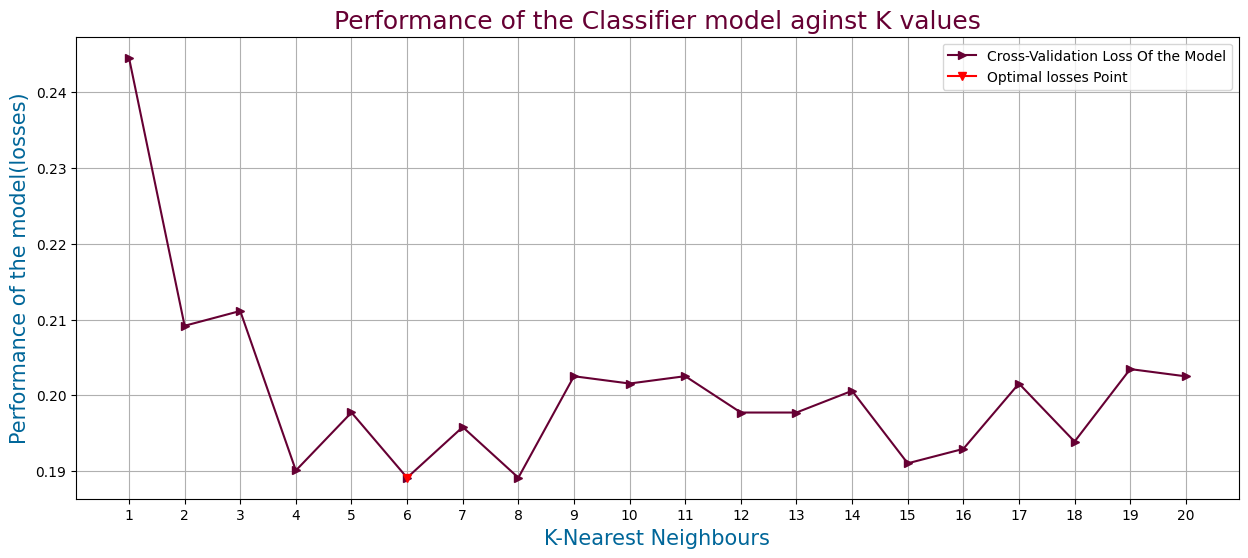

The model to have minimum losses it needs 6 nearest neighbours with a cross-validated loss of 0.1891
For distance metric euclidean, the performance is = 0.7519
For distance metric cosine, the performance is = 0.7443
For distance metric minkowski, the performance is = 0.7519
For distance metric chebyshev, the performance is = 0.7557
For distance metric manhattan, the performance is = 0.7519
For distance metric hamming, the performance is = 0.7557
Cross validation accuracy for the best KNN model: 0.8108544087491456
LogisticRegression Mean Cross validation accuracy: 0.7898382319434951


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
#Read the dataset using pandas framework
data = pd.read_csv('titanic3.csv')
#convert string gender values to binary 
key_val = {'male': 0, 'female': 1}
#map the changes to the sex column 
data['sex'] = data['sex'].map(key_val)
#Extract the feature and target variables of the dataset 
data = data[['pclass', 'age', 'sex','survived']]
#Fill all nan values with the mean of the distribution for each column
data = data.fillna(data.mean())
# Extract the feature variables into X
X = data[['pclass', 'sex', 'age']]
#Extraxct the target variable into y
y = data['survived']
cols = ['pclass', 'sex', 'age']
#Spit the data into train and test subsets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalize the data using the scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Create an instance of the KNN model
k2n = KNeighborsClassifier(n_neighbors=3)
#Fit the model with train fateure and target variables
k2n.fit(X_train, y_train)

#Predict the target variable values using the test data
y_pred = k2n.predict(X_test)
#measure the accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the KNN model with 3 n_neighbours is :", accuracy)

#3.3
# List to store cross-validated for each k
cv_loss = []

#Create an array of k values from 1 to 20 
k_n_citizen = np.arange(1, 21) 

# Iterate over different values of k
for k in k_n_citizen:
    # Use KNeighborsClassifier with the current neighbours 
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    # Fit the instance of KNeighborsClassifier model with train and test data
    knn_classifier.fit(X_train, y_train)    
    # Compute cross-validated score of the KNeighborsClassifier instance model using the train data and accuracy as scoring parameter
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')
    #Append all mean cross validation loss in the list given by deducting the cv score by one
    cv_loss.append(1- np.mean(scores))

# Find the optimal number of neighbors
optimal_knn_citizens = k_n_citizen[np.argmin(cv_loss)]
#Store the affordable loss of the good model
affordable_loss = np.min(cv_loss)

# plot showing performance against number of nearest neighbours
#Set the font styles for the labels
titleFont = {'color':'#660033','size':18, 'family':'sans-serif'}
labelsFont = {'color':'#006699','size':15, 'family':'sans-serif'}
#Set the figure size
plt.figure(figsize=(15, 6))
#plot the losses for different knn values
plt.plot(k_n_citizen, cv_loss, label='Cross-Validation Loss Of the Model', linestyle='-', color='#660033', marker='>')
#plot the affordable losses of the model 
plt.plot(optimal_knn_citizens, affordable_loss, color='red', label='Optimal losses Point', marker='v')
#Set the titles and labels for the graph
plt.title('Performance of the Classifier model aginst K values', fontdict=titleFont)
plt.xlabel('K-Nearest Neighbours', fontdict=labelsFont)
plt.grid(True)
plt.ylabel('Performance of the model(losses)', fontdict=labelsFont)
plt.xticks(k_n_citizen)
plt.legend()
plt.show()

print(f"The model to have minimum losses it needs {optimal_knn_citizens} nearest neighbours with a cross-validated loss of {affordable_loss:.4f}")

#3.4 Evaluate the performance using different distance metrics.
all_distance_types = ['euclidean', 'cosine', 'minkowski', 'chebyshev',  'manhattan', 'hamming']
#loop through all the distance metrics
for nth_distance in all_distance_types:
    #create instance of the model
    k2nCl = KNeighborsClassifier(n_neighbors=optimal_knn_citizens, metric=nth_distance)
    #Fitting the KNeighborsClassifier model with the train and test
    k2nCl.fit(X_train, y_train)
    #predict using the test set
    k2nCl_yPred = k2nCl.predict(X_test)
    #Passess the performance in prediction using cross validation
    performance = accuracy_score(y_test, k2nCl_yPred)
    #Printout the results 
    print(f'For distance metric {nth_distance}, the performance is = {performance:.4f}')

#Best Performing model is the one using distance metric hamming 
k2nHammingCl = KNeighborsClassifier(n_neighbors=optimal_knn_citizens)
# Compute cross-validated loss
Hammingscores = cross_val_score(k2nHammingCl, X_train, y_train, cv=5, scoring='accuracy')
print("Cross validation accuracy for the best KNN model:", Hammingscores.mean())
#Fit the logistic regression
k2n_log_reg = LogisticRegression()

#Assess the cross validation score of the model 
k2n_log_reg_cross_v_score = cross_val_score(k2n_log_reg, X_train, y_train, cv=5)
print("LogisticRegression Mean Cross validation accuracy:", k2n_log_reg_cross_v_score.mean())


Question 4 Assignment 6 DIAML

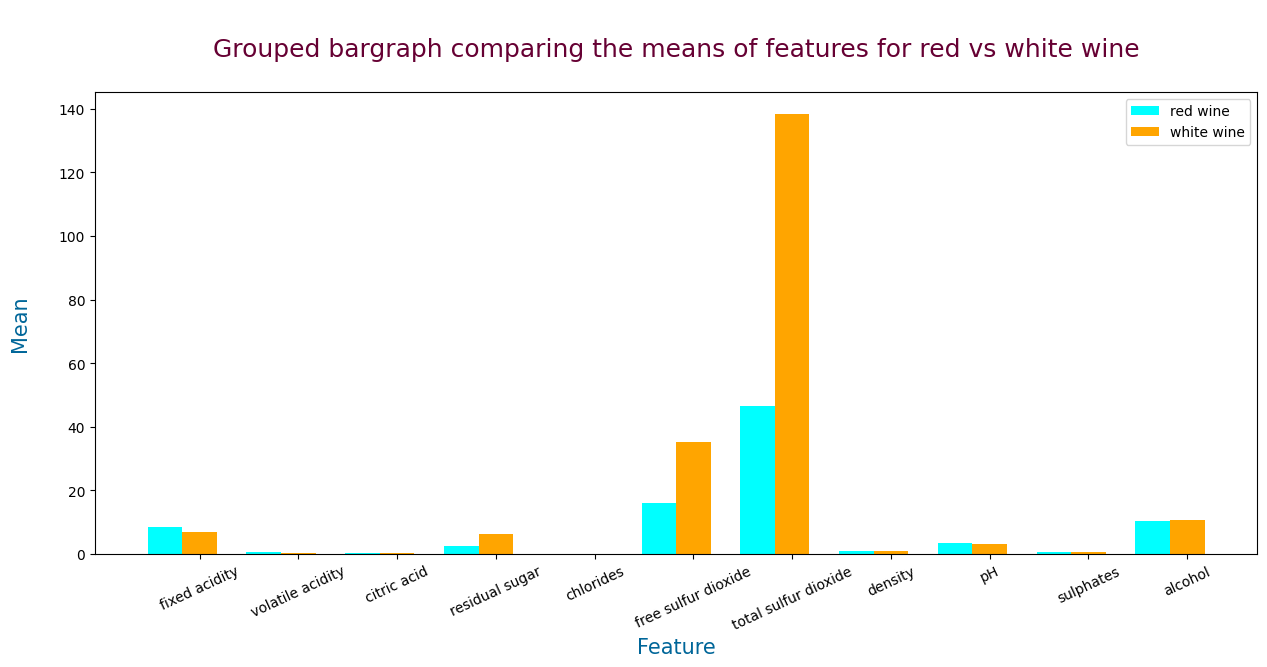


Correlation between features and red wine quality

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

Correlation between features and white wine quality

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64


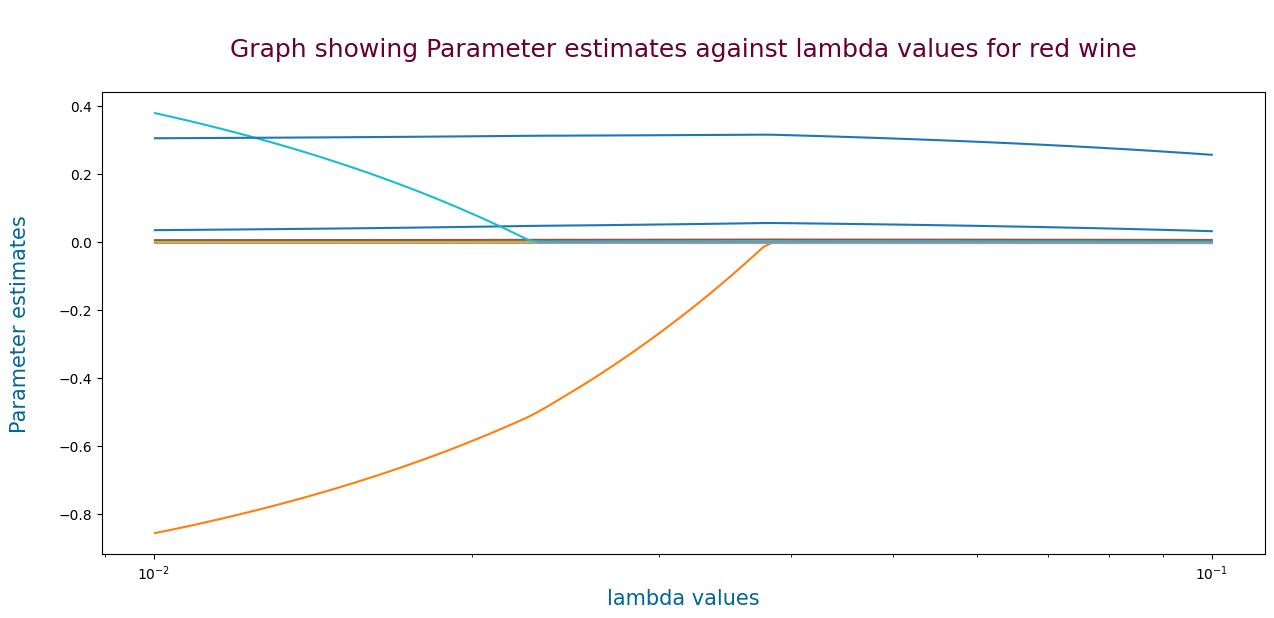

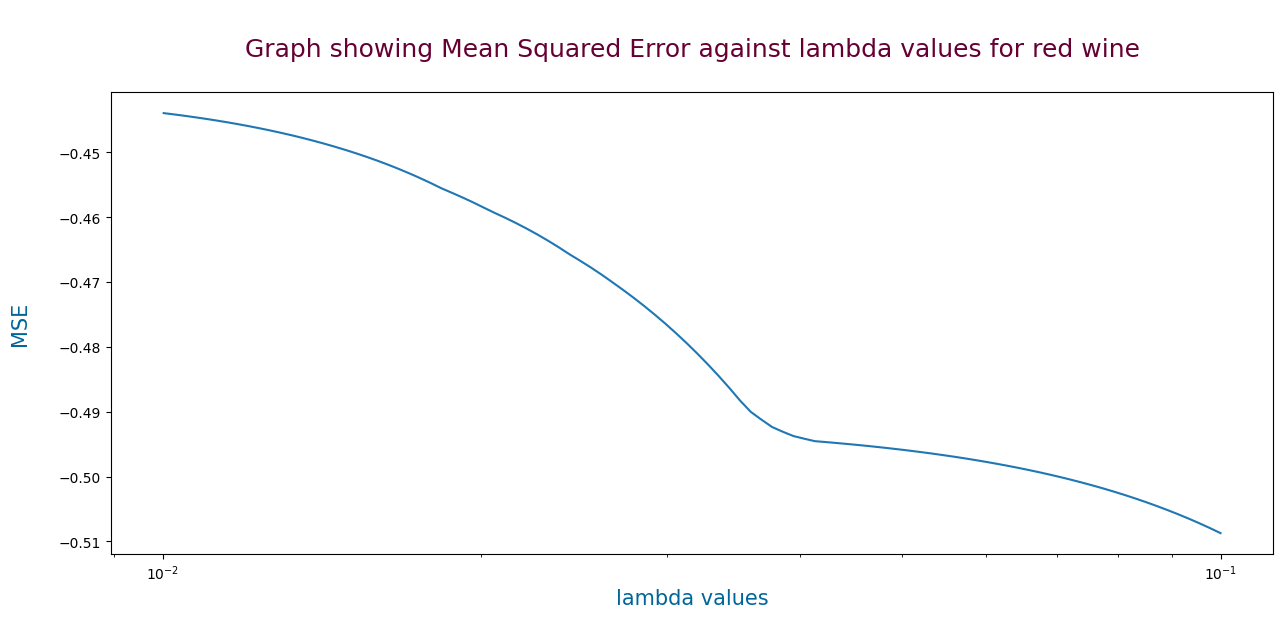

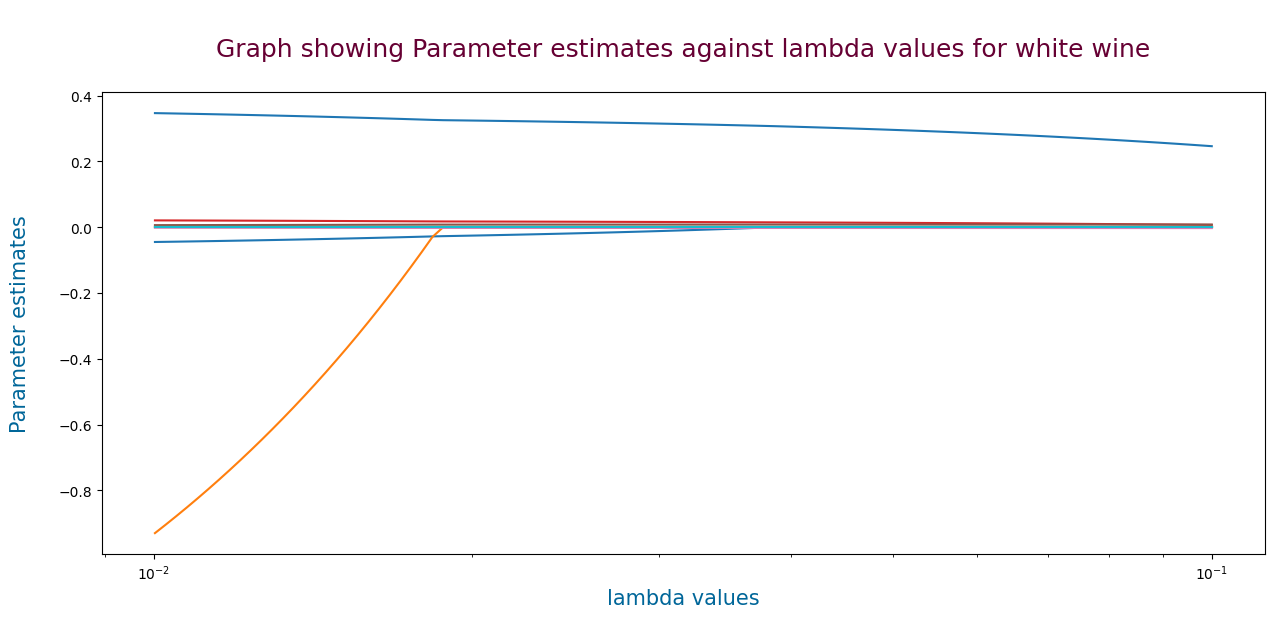

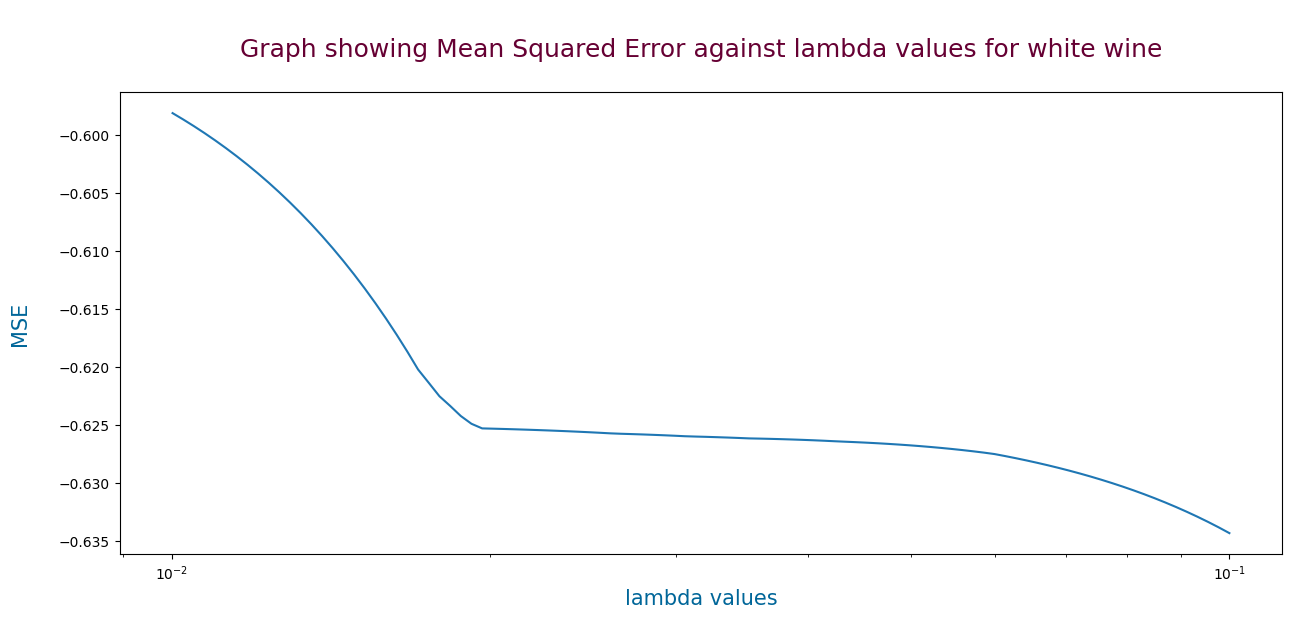


KNN Model Details:

Number of k neighbors: 3
Training data shape: (1047, 3)
Accuracy: 0.7417135709818636
Weights: uniform
Distance metric: minkowski


The Mean Squared Error of the KNN model is 0.533458411507192
The r-squared of the KNN model is 0.18151164590961955
The Mean Squared Error of the linear model is 0.4252352692407321
The r-squared of the linear model is 0.3475590446897766


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#Read the dataset for red wine
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
#Read the dataset for white wine 
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')

#Extract the features variables of the white wine
X_red_wine = red_wine.iloc[:, :-1]
#Extract all the feature variables of white wine
X_white_wine = white_wine.iloc[:, :-1]

#Extract the target variable for red wine
y_red_wine = red_wine.iloc[:, -1]
#Extract the feature variables for white wine
y_white_wine = white_wine.iloc[:, -1]

# Compute the Mean of red wine and plot it on the graph
red = X_red_wine.mean()

#Set the width of the bar graph
bar_width = 0.35

#Extract all column names into a variable 
features = X_red_wine.columns
#create an array of length equal to the number of features of the wine
index = np.arange(len(features))
#Set the size of the graph 

#font of the titles and labels
titleFont = {'color':'#660033','size':18, 'family':'sans-serif'}
labelsFont = {'color':'#006699','size':15, 'family':'sans-serif'}
#Figure size of the graph
plt.figure(figsize=(15, 6))
#Bar graph of the means of features for red wine
plt.bar(index-bar_width, X_red_wine.mean(), bar_width, color='cyan', label='red wine')
#Bar graph of the means of features for white wine
plt.bar(index, X_white_wine.mean(), bar_width, color='orange', label='white wine')
#Tilt the feature names by 25 degrees for them to fit on the x-axis
plt.xticks(index, features, rotation = 25)
#Set a title for the graph
plt.title("\nGrouped bargraph comparing the means of features for red vs white wine\n", fontdict = titleFont)
#Set the x-axis label
plt.xlabel("Feature", fontdict = labelsFont)
#Set the y-axis label
plt.ylabel("Mean\n", fontdict = labelsFont)
plt.legend()
#Display the graph
plt.show()

#4.2
#Correlation coefficient between feature variables and red wine quality
print("\nCorrelation between features and red wine quality\n")
print(red_wine.corr()['quality'])
#Correlation coefficient between feature variables and white wine quality
print("\nCorrelation between features and white wine quality\n")
print(white_wine.corr()['quality'])

#4.3
#Create an instance of the lasso regression model of red wine
lasso_red = Lasso()
#Create an instance of the lasso regression model of white wine
lasso_white = Lasso()
#Lists that shall contains values for coefficients and mse values
coefs_red = []
coefs_white = []
mse_values = []
mse_values2 = []

#Creating lambda values as log ranges
alphas_ = (np.logspace(0.001, 1,100))/100
#Looop through all lambda values
for alf in alphas_:
    #set the lambda value as parameter of the red wine lasso model
    lasso_red.set_params(alpha = alf)
    #set the lambda value as parameter of the white wine lasso model
    lasso_white.set_params(alpha = alf)

    #Fit the redwine model
    lasso_red.fit(X_red_wine, y_red_wine)
    #Fit the white wine model
    lasso_white.fit(X_white_wine, y_white_wine)
    #append red wine parameter estimates of the model to the list 
    coefs_red.append(lasso_red.coef_)
    #append white wine parameter estimates of the model to the list 
    coefs_white.append(lasso_white.coef_)
    #Create a scorer of MSE 
    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    #MSE for red wine
    mse_score = cross_val_score(lasso_red, X_red_wine, y_red_wine, cv=5, scoring=scorer)
    mse_values.append(mse_score.mean())
    #MSE for white wine
    mse_score2 = cross_val_score(lasso_white, X_white_wine, y_white_wine, cv=5, scoring=scorer)
    #Append the values to the second list 
    mse_values2.append(mse_score2.mean())

#Graph showing Parameter estimates against lambda values for red wine
plt.figure(figsize=(15, 6))
plt.plot(alphas_, coefs_red)
plt.xscale("log")
plt.title("\nGraph showing Parameter estimates against lambda values for red wine\n", fontdict = titleFont)
#Set the x-axis label
plt.xlabel("lambda values", fontdict = labelsFont)
#Set the y-axis label
plt.ylabel("Parameter estimates\n", fontdict = labelsFont)
plt.show()

#plot Graph showing Mean Squared Error against lambda values for red wine
plt.figure(figsize=(15, 6))
plt.plot(alphas_, mse_values)
plt.xscale("log")
plt.title("\nGraph showing Mean Squared Error against lambda values for red wine\n", fontdict = titleFont)
#Set the x-axis label
plt.xlabel("lambda values", fontdict = labelsFont)
#Set the y-axis label
plt.ylabel("MSE\n", fontdict = labelsFont)
plt.show()

#plot Graph showing Parameter estimates against lambda values for white wine
plt.figure(figsize=(15, 6))
plt.plot(alphas_, coefs_white)
plt.xscale("log")
plt.title("\nGraph showing Parameter estimates against lambda values for white wine\n", fontdict = titleFont)
#Set the x-axis label
plt.xlabel("lambda values", fontdict = labelsFont)
#Set the y-axis label
plt.ylabel("Parameter estimates\n", fontdict = labelsFont)
plt.show()

#Graph Graph showing Mean Squared Error against lambda values for white wine
plt.figure(figsize=(15, 6))
plt.plot(alphas_, mse_values2)
plt.xscale("log")
plt.title("\nGraph showing Mean Squared Error against lambda values for white wine\n", fontdict = titleFont)
#Set the x-axis label
plt.xlabel("lambda values", fontdict = labelsFont)
#Set the y-axis label
plt.ylabel("MSE\n", fontdict = labelsFont)
plt.show()

#Model tuning using lassoCV model for the optimal lambda values
red_lasso_cv_model = LassoCV(alphas=alphas_, cv = 10, max_iter=100000).fit(X_red_wine, y_red_wine)
#Build the new model using the remaining coefficients after tuning
red_lasso_tuned = Lasso().set_params(alpha = red_lasso_cv_model.alpha_).fit(X_red_wine, y_red_wine)
#Extract all coefficeint of features of the new models
coefficients = pd.Series(red_lasso_tuned.coef_, index = X_red_wine.columns)
#Make the name of the features as a list
selected_features = coefficients[coefficients != 0].index
X_lr = X_red_wine[selected_features]

# #4.4
# # Standardize features
# X_train, X_test, y_train, y_test = train_test_split(X_red_wine[selected_features], y_red_wine, test_size=0.25, random_state=42)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_lr, y_red_wine)

# #KNN model details
print("\nKNN Model Details:\n")
#KNN neighbours of the knn model
print("Number of k neighbors:", knn.n_neighbors)
print("Training data shape:", X_train.shape)
print("Accuracy:", knn.score(X_lr, y_red_wine))
print("Weights:", knn.weights)
print("Distance metric:", knn.metric)
print("\n")
knn_y_pred = knn.predict(X_lr)
knn_mse = mean_squared_error(y_red_wine,knn_y_pred)
knn_r2s = r2_score(y_red_wine, knn_y_pred)

print("The Mean Squared Error of the KNN model is", knn_mse)
print("The r-squared of the KNN model is", knn_r2s)
#Fit the linear regression model 
lnr = LinearRegression()

lnr.fit(X_lr, y_red_wine)
lnr_y_pred = lnr.predict(X_lr)
lnr_mse = mean_squared_error(y_red_wine,lnr_y_pred)
lnr_r2s = r2_score(y_red_wine, lnr_y_pred)

print("The Mean Squared Error of the linear model is", lnr_mse)
print("The r-squared of the linear model is", lnr_r2s)